In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import itertools
from itertools import combinations
import sklearn
from sklearn import model_selection,svm
from sklearn.svm import SVC
from sklearn.preprocessing import StandardScaler

import data_process_funcs
import meta_dataframe_functions
import ml_funcs

# Train, Validate, and Test on same experiment type


## Data


### Loading data

In [2]:
#Hardware data
df_4q_H = data_process_funcs.get_expanded_df('Hardware',4)
df_8q_H = data_process_funcs.get_expanded_df('Hardware',8)
#takes ~14s

In [3]:
#Simulated data
df_4q_S = data_process_funcs.get_expanded_df('Simulation',4)
df_8q_S = data_process_funcs.get_expanded_df('Simulation',8)
df_16q_S = data_process_funcs.get_expanded_df('Simulation',16)
#takes ~1 min 40s

In [4]:
#Reshreshed Simulated data
df_4q_R = data_process_funcs.get_expanded_df('Refreshed_Simulation',4)
df_8q_R = data_process_funcs.get_expanded_df('Refreshed_Simulation',8)
df_16q_R = data_process_funcs.get_expanded_df('Refreshed_Simulation',16)
#takes ~1 min

### Preprocessing data

In [3]:
#Hardware
df_4q_Hp = ml_funcs.apply_preprosessing(df_4q_H)
df_8q_Hp = ml_funcs.apply_preprosessing(df_8q_H)

In [6]:
#Simulated
df_4q_Sp = ml_funcs.apply_preprosessing(df_4q_S)
df_8q_Sp = ml_funcs.apply_preprosessing(df_8q_S)
df_16q_Sp = ml_funcs.apply_preprosessing(df_16q_S)

In [7]:
#Refreshed Simulated
df_4q_Rp = ml_funcs.apply_preprosessing(df_4q_R)
df_8q_Rp = ml_funcs.apply_preprosessing(df_8q_R)
df_16q_Rp = ml_funcs.apply_preprosessing(df_16q_R)

## All circuit_types Training and Scoring

In [8]:
model1 = SVC(kernel='linear')

#### Hardware

In [9]:
#4 qubits
print("4 qubits Hardware:")
fitted_model_4H_m1,score_4H_m1,cv_score_4H_m1 = ml_funcs.std_split_fit_and_scores(df_4q_Hp,model1)

#8 qubits
print("8 qubits Hardware:")
fitted_model_8H_m1,score_8H_m1,cv_score_8H_m1 = ml_funcs.std_split_fit_and_scores(df_8q_Hp,model1)

4 qubits Hardware:
Accuracy: 1.0
Cross-validation accuracy:  [1. 1. 1. 1. 1.]
8 qubits Hardware:
Accuracy: 1.0
Cross-validation accuracy:  [1. 1. 1. 1. 1.]


#### Simulations

In [17]:
print("4 qubits Simulations:")
fitted_model_4S_m1,score_4S_m1,cv_score_4S_m1 = ml_funcs.std_split_fit_and_scores(df_4q_Sp,model1)

#8 qubits
print("8 qubits Simulations:")
fitted_model_8S_m1,score_8S_m1,cv_score_8S_m1 = ml_funcs.std_split_fit_and_scores(df_8q_Sp,model1)


4 qubits Simulations:
Accuracy: 0.9458333333333333
Cross-validation accuracy:  [0.97395833 0.94791667 0.93229167 0.94791667 0.95833333]
8 qubits Simulations:
Accuracy: 0.9666666666666667
Cross-validation accuracy:  [0.96875    0.97916667 1.         0.984375   0.99479167]


In [11]:

#16 qubits
print("16 qubits Simulations:")
fitted_model_16S_m1,score_16S_m1,cv_score_16S_m1 = ml_funcs.std_split_fit_and_scores(df_16q_Sp,model1,fold_=3)

16 qubits Simulations:
Accuracy: 0.9744680851063829
Cross-validation accuracy:  [0.97444089 0.99361022 0.97435897]


In [14]:
#fiddling
model2 = SVC(kernel='rbf')
#4 qubits
print("4 qubits Simulations:")
fitted_model,score,cv_score = ml_funcs.std_split_fit_and_scores(df_4q_Sp,model2)

#8 qubits
print("8 qubits Simulations:")
fitted_model,score,cv_score = ml_funcs.std_split_fit_and_scores(df_8q_Sp,model2)

4 qubits Simulations:
Accuracy: 0.9791666666666666
Cross-validation accuracy:  [0.97916667 0.94791667 0.95833333 0.94270833 0.92708333]
8 qubits Simulations:
Accuracy: 0.95
Cross-validation accuracy:  [0.91666667 0.953125   0.95833333 0.921875   0.95833333]


#### Refreshed Simulations

In [18]:
#4 qubits
print("4 qubits Refreshed:")
fitted_model_4R_m1,score_4R_m1,cv_score_4R_m1 = ml_funcs.std_split_fit_and_scores(df_4q_Rp,model1)

#8 qubits
print("8 qubits Refreshed:")
fitted_model_8R_m1,score_8R_m1,cv_score_8R_m1 = ml_funcs.std_split_fit_and_scores(df_8q_Rp,model1)


4 qubits Refreshed:
Accuracy: 1.0
Cross-validation accuracy:  [1.         1.         1.         1.         0.98958333]
8 qubits Refreshed:
Accuracy: 0.9916666666666667
Cross-validation accuracy:  [0.98958333 1.         0.98958333 0.98958333 1.        ]


In [16]:
print("16 qubits Refreshed:")
fitted_model_16R_m1,score_16R_m1,cv_score_16R_m1 = ml_funcs.std_split_fit_and_scores(df_16q_Rp,model1,fold_=3)

16 qubits Refreshed:
Accuracy: 1.0
Cross-validation accuracy:  [1. 1. 1.]


#### Plotting

In [19]:
Hardware_scores = [score_4H_m1,score_8H_m1]
Sim_scores = [score_4S_m1,score_8S_m1,score_16S_m1]
Refr_scores = [score_4R_m1,score_8R_m1,score_16R_m1]

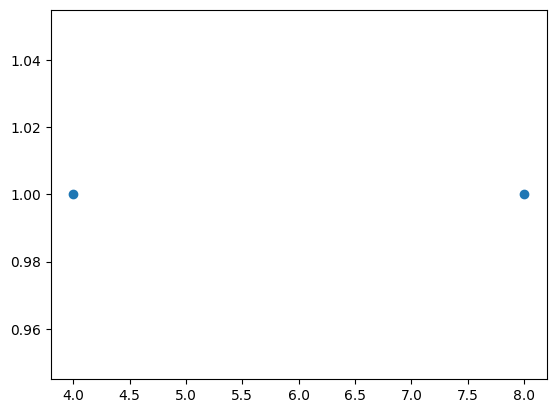

In [26]:
plt.scatter(x=[4,8],y=Hardware_scores)
plt.show()

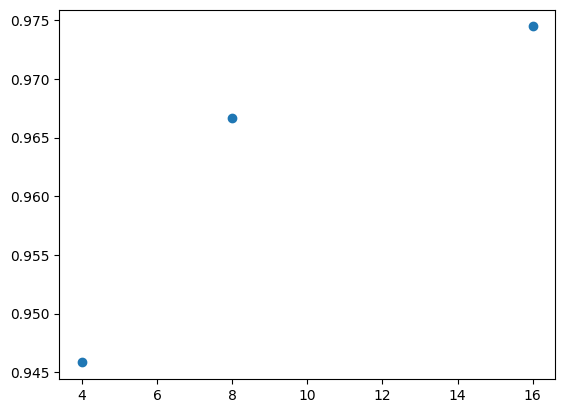

In [27]:
plt.scatter(x=[4,8,16],y=Sim_scores)
plt.show()

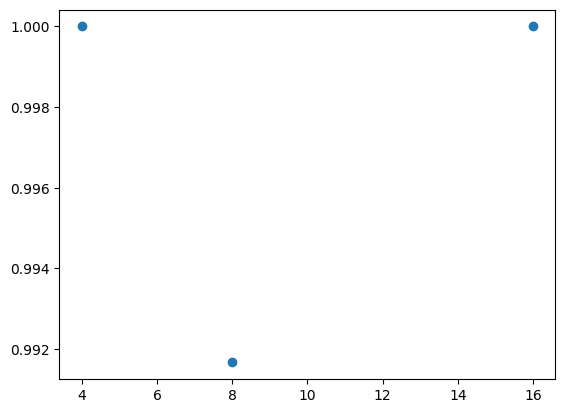

In [28]:
plt.scatter(x=[4,8,16],y=Refr_scores)
plt.show()

# using1 circuit type at a time

In [5]:
model1 = SVC(kernel='linear')

### long way

In [38]:
df_4q_Hp_c1 = df_4q_Hp[df_4q_Hp['circuit_type']==1]
df_4q_Hp_c2 = df_4q_Hp[df_4q_Hp['circuit_type']==2]
df_4q_Hp_c3 = df_4q_Hp[df_4q_Hp['circuit_type']==3]

In [39]:
print("4 qubits Hardware c1 only:")
ml_funcs.std_split_fit_and_scores(df_4q_Hp_c1,model1)

print("4 qubits Hardware c2 only:")
ml_funcs.std_split_fit_and_scores(df_4q_Hp_c2,model1)

print("4 qubits Hardware c3 only:")
ml_funcs.std_split_fit_and_scores(df_4q_Hp_c3,model1)

4 qubits Hardware c1 only:
Accuracy: 1.0
Cross-validation accuracy:  [1. 1. 1. 1. 1.]
4 qubits Hardware c2 only:
Accuracy: 1.0
Cross-validation accuracy:  [1. 1. 1. 1. 1.]
4 qubits Hardware c3 only:
Accuracy: 1.0
Cross-validation accuracy:  [1. 1. 1. 1. 1.]


(SVC(kernel='linear'), 1.0, array([1., 1., 1., 1., 1.]))

In [40]:
df_4q_Sp_c1 = df_4q_Sp[df_4q_Sp['circuit_type']==1]
df_4q_Sp_c2 = df_4q_Sp[df_4q_Sp['circuit_type']==2]
df_4q_Sp_c3 = df_4q_Sp[df_4q_Sp['circuit_type']==3]

In [41]:
print("4 qubits Sim c1 only:")
ml_funcs.std_split_fit_and_scores(df_4q_Sp_c1,model1)

print("4 qubits Sim c2 only:")
ml_funcs.std_split_fit_and_scores(df_4q_Sp_c2,model1)

print("4 qubits Sim c3 only:")
ml_funcs.std_split_fit_and_scores(df_4q_Sp_c3,model1)

4 qubits Sim c1 only:
Accuracy: 1.0
Cross-validation accuracy:  [1. 1. 1. 1. 1.]
4 qubits Sim c2 only:
Accuracy: 0.9875
Cross-validation accuracy:  [0.984375 0.984375 0.984375 0.984375 0.984375]
4 qubits Sim c3 only:
Accuracy: 1.0
Cross-validation accuracy:  [1.       1.       0.984375 1.       1.      ]


(SVC(kernel='linear'),
 1.0,
 array([1.      , 1.      , 0.984375, 1.      , 1.      ]))

In [42]:
df_4q_Rp_c1 = df_4q_Rp[df_4q_Rp['circuit_type']==1]
df_4q_Rp_c2 = df_4q_Rp[df_4q_Rp['circuit_type']==2]
df_4q_Rp_c3 = df_4q_Rp[df_4q_Rp['circuit_type']==3]

In [43]:
print("4 qubits RSim c1 only:")
ml_funcs.std_split_fit_and_scores(df_4q_Rp_c1,model1)

print("4 qubits RSim c2 only:")
ml_funcs.std_split_fit_and_scores(df_4q_Rp_c2,model1)

print("4 qubits RSim c3 only:")
ml_funcs.std_split_fit_and_scores(df_4q_Rp_c3,model1)

4 qubits RSim c1 only:
Accuracy: 1.0
Cross-validation accuracy:  [1. 1. 1. 1. 1.]
4 qubits RSim c2 only:
Accuracy: 1.0
Cross-validation accuracy:  [1. 1. 1. 1. 1.]
4 qubits RSim c3 only:
Accuracy: 1.0
Cross-validation accuracy:  [1. 1. 1. 1. 1.]


(SVC(kernel='linear'), 1.0, array([1., 1., 1., 1., 1.]))

### using functions

In [9]:
def get_accuracies_for_comparison(model, tr_val_dfp, tr_label,test_dfps, test_dfp_labels, to_print = False):
    
    test_scores = []
    labels =[]
    labels = labels +test_dfp_labels
    labels.insert(0,"self_score")
   
    X_tr_val,Y_tr_val = ml_funcs.get_x_y(tr_val_dfp)
    X_train_self, X_test_self, Y_train_self, Y_test_self = model_selection.train_test_split(
    X_tr_val,Y_tr_val,test_size=0.2,shuffle = True,random_state=42)
    fitted_model, self_score = ml_funcs.fit_and_get_score(
    model,X_train_self,Y_train_self,X_test_self,Y_test_self)

    test_scores.append(self_score)

    for dfp in test_dfps:
        X,Y = ml_funcs.get_x_y(dfp)
        test_score = fitted_model.score(X, Y) #check score vs accurcy_score
        test_scores.append(test_score)

    if to_print:
        print("Trained on ",tr_label)
        for i in range(len(test_scores)):
            print(labels[i],":",test_scores[i])

    return test_scores ,labels

In [5]:
def split_into_circuits(df_all_circuits):
    circuits = df_all_circuits.groupby('circuit_type')
    circuit_1 = circuits.get_group(1)
    circuit_2 = circuits.get_group(2)
    circuit_3 = circuits.get_group(3)
    return [circuit_1,circuit_2,circuit_3]

def generate_combos(individual_dfps,include_combined=False):
    nr_indiv = len(individual_dfps)
    combos =[]
    
    for i in range(nr_indiv):
        combo = individual_dfps
        combo.insert(0, combo.pop(i))
        if include_combined:
            #make elements joined as pairs
            pair_dfs = make_pairs(combo[1:])
            #append the paired elements
            combo = combo+ pair_dfs
        combos.append(combo)

    return combos

def make_pairs(indiv_dfs):
    pairs = list(combinations(indiv_dfs, 2))
    pair_dfs = []
    for pair in pairs:
        df = pd.concat(pair)
        pair_dfs.append(df)

    return pair_dfs


In [6]:
circuit_dfs = split_into_circuits(df_4q_Hp)
#print(circuit_dfs)

In [ ]:
#pair_dfs = make_pairs(circuit_dfs)
#print(pair_dfs)

In [7]:
combos = generate_combos(circuit_dfs,True)

In [10]:
train_label = "c1"
test_labels = ["test on c2","test on c3","test on c2,3"]
tr_val = combos[0][0]
test_dfs = combos[0][1:]

model1 = SVC(kernel='linear')

scores,labels= get_accuracies_for_comparison(
model1, tr_val,train_label, test_dfs,test_labels, True)

Trained on  c1
self_score : 1.0
test on c2 : 1.0
test on c3 : 0.9824561403508771
test on c2,3 : 1.0


In [12]:
def get_accuracies_for_comparisonS(model,combos,combo_labels,to_print_ = False):
    total_scores =[]
    total_labels =[]

    for combo, labels in zip(combos,combo_labels):
        train_label = labels[0]
        test_labels = labels[1:]
        tr_val = combo[0]
        test_dfs = combo[1:]

        scores,labels= get_accuracies_for_comparison(
        model, tr_val,train_label, test_dfs,test_labels, to_print = to_print_)
        total_scores.append(scores)
        total_labels.append(labels)
        
    return total_scores,total_labels

In [14]:
combo_labels =[ ["c1", "test on c2","test on c3","test on c2,3"],
         ["c2", "test on c1","test on c3","test on c1,3"],
         ["c3", "test on c1","test on c2","test on c1,2"]
]

total_scores,total_labels = get_accuracies_for_comparisonS(model1,combos,combo_labels,to_print_ = True)

Trained on  c1
self_score : 1.0
test on c2 : 1.0
test on c3 : 0.9824561403508771
test on c2,3 : 1.0
Trained on  c2
self_score : 1.0
test on c1 : 1.0
test on c3 : 0.9649122807017544
test on c1,3 : 0.9736842105263158
Trained on  c3
self_score : 1.0
test on c1 : 1.0
test on c2 : 1.0
test on c1,2 : 1.0


In [ ]:
df_4q_Hp_c1 = df_4q_Hp[df_4q_Hp['circuit_type']==1]
df_4q_Hp_c2 = df_4q_Hp[df_4q_Hp['circuit_type']==2]
df_4q_Hp_c3 = df_4q_Hp[df_4q_Hp['circuit_type']==3]

In [ ]:
df_4q_Sp_c1 = df_4q_Sp[df_4q_Sp['circuit_type']==1]
df_4q_Sp_c2 = df_4q_Sp[df_4q_Sp['circuit_type']==2]
df_4q_Sp_c3 = df_4q_Sp[df_4q_Sp['circuit_type']==3]

In [ ]:
df_4q_Rp_c1 = df_4q_Rp[df_4q_Rp['circuit_type']==1]
df_4q_Rp_c2 = df_4q_Rp[df_4q_Rp['circuit_type']==2]
df_4q_Rp_c3 = df_4q_Rp[df_4q_Rp['circuit_type']==3]